# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [22]:
# Your code here

student_data = {
    'StudentID': [1,2,3,4,5,6,7,8,9,10], 
    'Age':[17,51,27,21,36,48,19,26,54,30], 
    'Tardies':[10,1,5,9,4,2,9,6,0,3]
}

student_data = pd.DataFrame(student_data)

In [9]:
from sklearn import linear_model


import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


Draw a dispersion diagram (scatter plot) for the data.

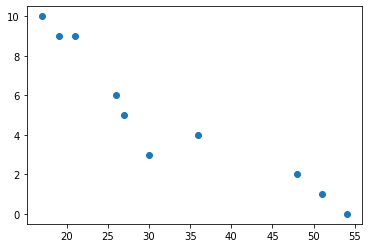

In [23]:
# Your code here.

plt.scatter(student_data['Age'],student_data['Tardies'])
plt.show()


Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [ ]:
# Your response here. 

# Yes, the older the student, the less problable they are to arrive at class at time.


Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [17]:
# Your response here.
#correlation:

print('Correlation:')

display(student_data.corr(method='pearson'))


#covariance:


print('Covariance')
display(np.cov(student_data))


Correlation:


,X,Y
X,1.000000,-0.939163
Y,-0.939163,1.000000


Covariance


array([[  24.5,  175. ,   77. ,   42. ,  112. ,  161. ,   35. ,   70. ,
         189. ,   94.5],
       [ 175. , 1250. ,  550. ,  300. ,  800. , 1150. ,  250. ,  500. ,
        1350. ,  675. ],
       [  77. ,  550. ,  242. ,  132. ,  352. ,  506. ,  110. ,  220. ,
         594. ,  297. ],
       [  42. ,  300. ,  132. ,   72. ,  192. ,  276. ,   60. ,  120. ,
         324. ,  162. ],
       [ 112. ,  800. ,  352. ,  192. ,  512. ,  736. ,  160. ,  320. ,
         864. ,  432. ],
       [ 161. , 1150. ,  506. ,  276. ,  736. , 1058. ,  230. ,  460. ,
        1242. ,  621. ],
       [  35. ,  250. ,  110. ,   60. ,  160. ,  230. ,   50. ,  100. ,
         270. ,  135. ],
       [  70. ,  500. ,  220. ,  120. ,  320. ,  460. ,  100. ,  200. ,
         540. ,  270. ],
       [ 189. , 1350. ,  594. ,  324. ,  864. , 1242. ,  270. ,  540. ,
        1458. ,  729. ],
       [  94.5,  675. ,  297. ,  162. ,  432. ,  621. ,  135. ,  270. ,
         729. ,  364.5]])

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [18]:
# Your response here.

model = linear_model.LinearRegression()




In [25]:
x = student_data[['Age']]
y = student_data['Tardies']


result = model.fit(x,y)

display(result.intercept_)
display(result.coef_)

12.888803363135768

array([-0.24282077])

Plot your regression model on your scatter plot.

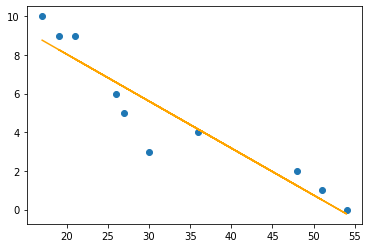

In [26]:
# Your code here.

regression_line = result.intercept_ + result.coef_[0]*x
plt.plot(x, regression_line, c='orange')
plt.scatter(x,y)
plt.show()


Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [28]:
# Your response here. 

result.score(x,y)

# this model is able to predict what will be the number of "Tardies" by age with with great accuracy,
# having a score of 88%.


0.8820265558250109

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [38]:
# Import any libraries you may need & the data

vehicles = pd.read_csv('vehicles.csv')


In [46]:
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

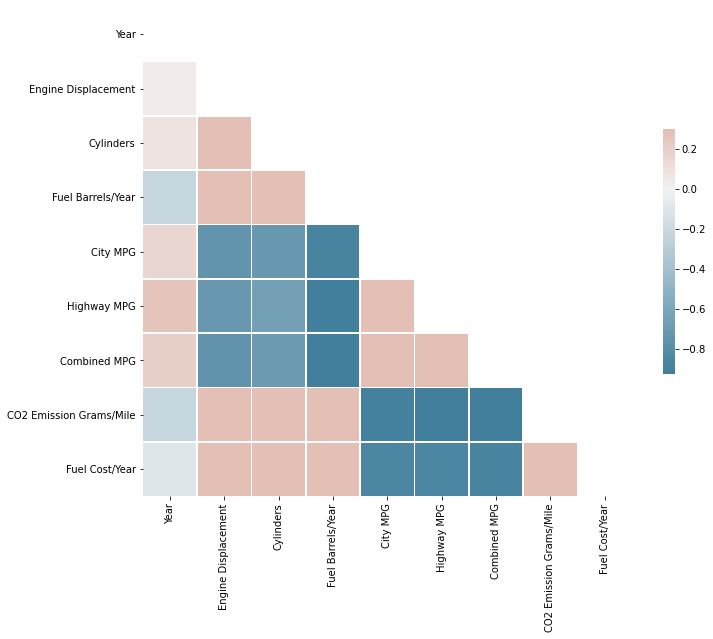

In [39]:
# Your response here. 

import seaborn as sns

corr = vehicles.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()


In [40]:
corr

# we see that co2 emissions are related to city mpg, highway mpg and of course combined mpg.
# with the other variables not so mutch

,Year,Engine Displacement,Cylinders,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
Year,1.000000,0.037876,0.082469,-0.221084,0.161818,0.267259,0.204751,-0.222300,-0.091913
Engine Displacement,0.037876,1.000000,0.901858,0.789752,-0.740317,-0.715039,-0.746782,0.803520,0.769678
Cylinders,0.082469,0.901858,1.000000,0.739517,-0.703866,-0.650287,-0.698648,0.752393,0.778153
Fuel Barrels/Year,-0.221084,0.789752,0.739517,1.000000,-0.877752,-0.909664,-0.909743,0.986189,0.916208
City MPG,0.161818,-0.740317,-0.703866,-0.877752,1.000000,0.923856,0.985457,-0.894139,-0.858645
Highway MPG,0.267259,-0.715039,-0.650287,-0.909664,0.923856,1.000000,0.969392,-0.926405,-0.851404
Combined MPG,0.204751,-0.746782,-0.698648,-0.909743,0.985457,0.969392,1.000000,-0.926229,-0.875185
CO2 Emission Grams/Mile,-0.222300,0.803520,0.752393,0.986189,-0.894139,-0.926405,-0.926229,1.000000,0.930865
Fuel Cost/Year,-0.091913,0.769678,0.778153,0.916208,-0.858645,-0.851404,-0.875185,0.930865,1.000000


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [55]:
# Your response here. 

x = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
y = vehicles['CO2 Emission Grams/Mile']


In [56]:
result = model.fit(x,y)

display(result.intercept_)
display(result.coef_)

769.8882836465834

array([-0.32061673,  1.87879976, 19.05292507, -3.04039938,  0.03230948])

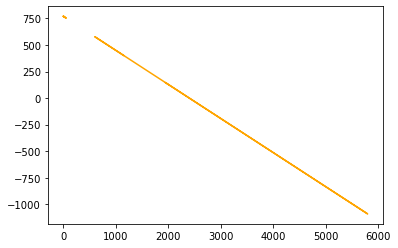

In [57]:
regression_line = result.intercept_ + result.coef_[0]*x
plt.plot(x, regression_line, c='orange')
plt.show()

In [58]:
from sklearn.metrics import mean_squared_error

display(mean_squared_error(result.predict(x),y))

271.1196550702997

In [59]:
result.score(x,y)

0.9808734920269122

In [ ]:
# i decided to do multilinear regression because we have many variables that have numeric values.

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [60]:
# Your response here. 


import sklearn.metrics as metrics
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [72]:
regression_results(y,result.predict(x))

explained_variance:  0.9809
mean_squared_log_error:  0.0027
r2:  0.9809
MAE:  7.4877
MSE:  271.1197
RMSE:  16.4657


## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [88]:
# Your code here.

new_dict = {
'x': [1,3,4,6,8,9,11,14],
'y': [1,2,4,4,5,7,8,13]
}

data = pd.DataFrame(new_dict)

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

RESULTS FOR ATTENDANCE:


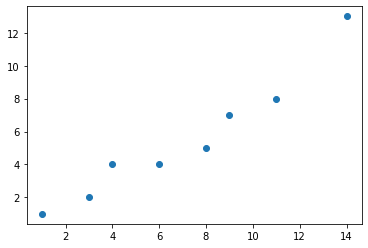

-0.43939393939393945

array([0.84848485])

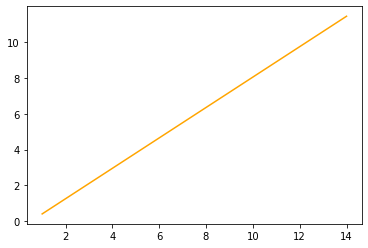

RESULTS FOR MISSING PEOPLE:


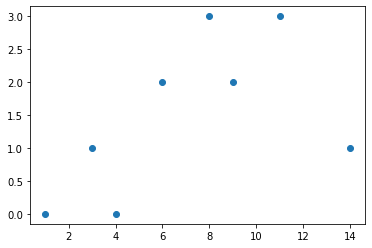

0.4393939393939392

array([0.15151515])

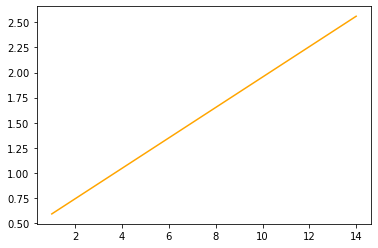

In [83]:
# Your code here.


# ATTENDANCE

print('RESULTS FOR ATTENDANCE:')

plt.scatter(data['x'],data['y'])
plt.show()

x = data[['x']]
y = data['y']

result = model.fit(x,y)

display(result.intercept_)
display(result.coef_)

regression_line = result.intercept_ + result.coef_[0]*x
plt.plot(x, regression_line, c='orange')
plt.show()

# NOT ATTENDING

print('RESULTS FOR MISSING PEOPLE:')

data['z'] = data['x'] - data['y']

plt.scatter(data['x'],data['z'])
plt.show()

x = data[['x']]
z = data['z']

result = model.fit(x,z)

display(result.intercept_)
display(result.coef_)

regression_line = result.intercept_ + result.coef_[0]*x
plt.plot(x, regression_line, c='orange')
plt.show()


What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [84]:
# Your response here. 


print('RESULTS FOR ATTENDACE:')

regression_results(y,result.predict(x))

print('RESULTS FOR MISING:')

regression_results(z,result.predict(x))

# yes, the more people you invite the more dont attend, but at the same time the more people you invite the more attend.
# and actually the corr between invited and attending is higher, 
# so you definitely should invite more people to have a bomb party

RESULTS FOR ATTENDACE:
explained_variance:  0.303
mean_squared_log_error:  0.8009
r2:  -0.9519
MAE:  4.0
MSE:  24.8864
RMSE:  4.9886
RESULTS FOR MISING:
explained_variance:  0.303
mean_squared_log_error:  0.1701
r2:  0.303
MAE:  0.7992
MSE:  0.8712
RMSE:  0.9334


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [90]:
# Your response here. 

data['z'] = data['x'] - data['y']

In [91]:
data = data.iloc[[1,3,4,5,6,7]]

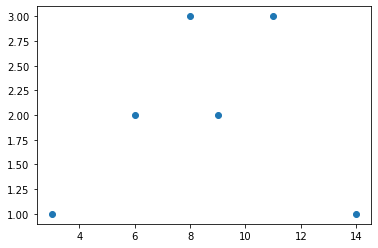

1.7687074829931972

array([0.02721088])

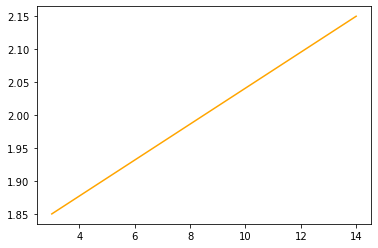

explained_variance:  0.0136
mean_squared_log_error:  0.0813
r2:  0.0136
MAE:  0.6712
MSE:  0.6576
RMSE:  0.8109


In [94]:
plt.scatter(data['x'],data['z'])
plt.show()

x = data[['x']]
z = data['z']

result = model.fit(x,z)

display(result.intercept_)
display(result.coef_)

regression_line = result.intercept_ + result.coef_[0]*x
plt.plot(x, regression_line, c='orange')
plt.show()

regression_results(z,result.predict(x))

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 

# without the problematic the model become less reliable, but the error got smaller.
